# Amazon Product Analysis Project

In this project, we analyzed a dataset of over 1.000 products listed on Amazon and building a recommendation system for these products.
The dataset includes details such as product name, category, price, rating, and user reviews.
The goal of this project is to understand customer preferences, identify purchasing patterns, and develop a recommendation system to suggest products to users based on their interests.

*This project will consist of the following steps :*

1. Data Collection : Collect the Amazon products dataset from Kaggle.
2. Data Preparation : Clean and preprocess the dataset for analysis.
3. Exploratory Data Analysis : Analyze the data to understand the distribution of products by categories, customer ratings, and reviews.
4. Data Visuallization : Visualize the data to identify trends and patterns

### 1. IMPORT DATA AND LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw data
df = pd.read_csv("amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [2]:
# List total number of rows and columns
print("This dataset contains ", df.shape[0], " rows and ", df.shape[1], " columns")

This dataset contains  1465  rows and  16  columns


### 2. DATA PREPARATION

Before analyzing the data, it is important to clean and prepare data. The methods used to clean and prepare the data as listed below:
1. Change data types of colums from object to float
2. Fill missing value
3. Check for duplicated rows
4. Split long strings
5. Create additional columns for analyzing

In [3]:
# Replace string value and change data type
df['actual_price'] = df['actual_price'].str.replace('₹','')
df['actual_price'] = df['actual_price'].str.replace(',','').astype('float64')

df['discounted_price'] = df['discounted_price'].str.replace('₹','')
df['discounted_price'] = df['discounted_price'].str.replace(',','').astype('float64')

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')
df['discount_percentage'] = df['discount_percentage']/100

df['rating_count'] = df['rating_count'].str.replace(',','').astype('float64')

# check fault data and replace true value
df['rating'] = df['rating'].str.replace('|','4.0').astype('float64')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21760\3380232468.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating'] = df['rating'].str.replace('|','4.0').astype('float64')


In [4]:
#drop unnescessary columns
df = df.drop(['about_product','user_id','user_name','review_id','img_link','product_link'], axis=1)

#split the value of column 'category'
df1 = df['category'].copy()
catsplit = df1.str.split('|', expand=True)

# check product category amount
catsplit.isnull().sum()

# category 0 and category 1 have zero null cell => most of product have atleast 2 category => 0 is main and 1 is subcategory
catsplit = catsplit.rename(columns={0:'Maincategory', 1:'Subcategory'})
catsplit['Maincategory'].replace(',', ' & ')

#create new columns
df['Maincategory'] = catsplit['Maincategory']
df['Subcategory'] = catsplit['Subcategory']

#drop the old columns
df.drop('category', axis = 1, inplace=True)

In [5]:
#Checking for duplicated
duplicates = df.duplicated()
df[duplicates]

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content,Maincategory,Subcategory
393,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals
422,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),229.0,299.0,0.23,4.3,30411.0,"Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,Computers&Accessories,Accessories&Peripherals
423,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,299.0,0.33,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals
428,B08CF3D7QR,Portronics Konnect L POR-1081 Fast Charging 3A...,154.0,339.0,0.55,4.3,13391.0,Good for fast charge but not for data transfer...,The cable is efficient in fast charging but in...,Computers&Accessories,Accessories&Peripherals
456,B09KLVMZ3B,Portronics Konnect L 1.2M POR-1401 Fast Chargi...,159.0,399.0,0.60,4.1,4768.0,"Great but,Worked well for 6 six months that’s ...",Loosing charging cable of apple is costly affa...,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...,...,...
1007,B0B9BXKBC7,"WeCool S5 Long Selfie Stick, with Large Reinfo...",1799.0,3999.0,0.55,4.6,245.0,"Good,Good Product but Little expensive.,Happy ...","Good,Thoda sa kam stable hai, phone lagane ke ...",Electronics,Mobiles&Accessories
1010,B07GVGTSLN,Wayona Usb Type C Fast Charger Cable Fast Char...,325.0,1299.0,0.75,4.2,10576.0,"Nice product .,Good quality Braided cable, VFM...","Sturdy packing, good product!,Have used this b...",Computers&Accessories,Accessories&Peripherals
1017,B0B9BD2YL4,KINGONE Wireless Charging Pencil (2nd Generati...,2599.0,6999.0,0.63,4.5,1526.0,"Quite Good,good pencil,Value for money,Brillia...",After 10 days of use bhaut acha chl rha ha and...,Electronics,Mobiles&Accessories
1018,B0BMXMLSMM,Lapster 65W compatible for OnePlus Dash Warp C...,199.0,999.0,0.80,4.5,127.0,"Super charger in lapster,Best among the rest,C...","Best quality,The product looks original-like a...",Computers&Accessories,Accessories&Peripherals


In [6]:
# Delete duplicated values
df = df.drop_duplicates()

In [7]:
#Checking for duplicates again
df[duplicates]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21760\1558386948.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[duplicates]


,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content,Maincategory,Subcategory


In [8]:
#Checking Missing Values
df.isna().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
review_title           0
review_content         0
Maincategory           0
Subcategory            0
dtype: int64

In [9]:
#As the execution above showing that we are missing 2 value from rating count and data from this column are quantiative, so we use mean value to fill up this column
df.rating_count.mean()
df['rating_count']=df.rating_count.fillna(df.rating_count.mean()).astype('float64')

#check after filling
df.isna().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
review_title           0
review_content         0
Maincategory           0
Subcategory            0
dtype: int64

### 3. EXPLORATORY DATA ANALYSIS

In this stage, we will try to elaborate our insights through Visualization, Pivot table and Short explainations

In [10]:
#Specific Details about the Discount Percentage
df['discount_percentage'].describe()

count    1397.000000
mean        0.472649
std         0.217366
min         0.000000
25%         0.310000
50%         0.500000
75%         0.630000
max         0.940000
Name: discount_percentage, dtype: float64

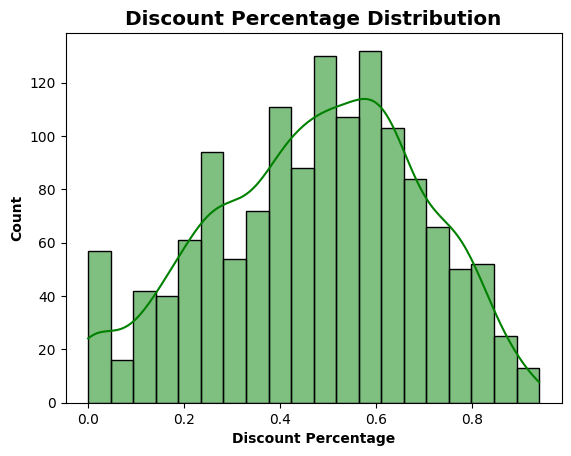

In [11]:
#Discount Percentage Distribution
discount_fig = sns.histplot(data=df, x = 'discount_percentage', bins=20, kde=True, color='green' )
discount_fig.set_xlabel('Discount Percentage', fontweight = 'bold')
discount_fig.set_ylabel('Count', fontweight = 'bold')
discount_fig.set_title('Discount Percentage Distribution', fontweight = 'heavy', size= 'x-large')

plt.show()

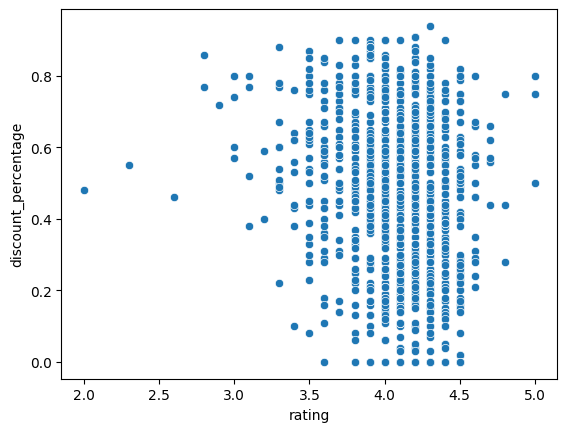

In [12]:
# Dependency of Rating and Discount_percentage
sns.scatterplot(df,x='rating', y='discount_percentage')
plt.show()


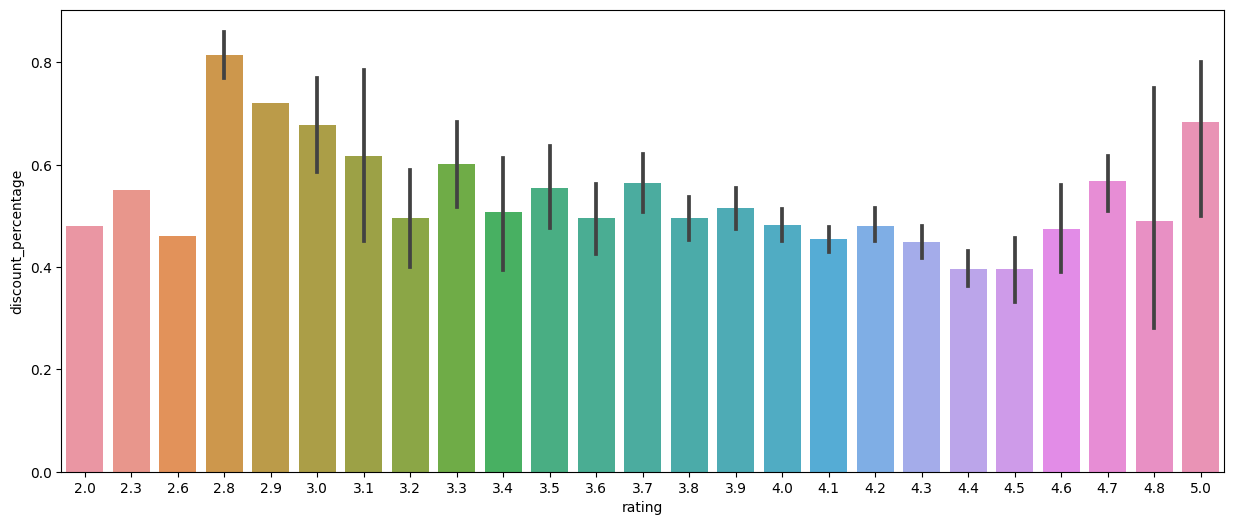

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(df, x='rating', y='discount_percentage')
plt.show()

Overall, the rating is not heavily affected by discount percentage

Text(0.5, 1.0, 'Amount of Ratings distribution')

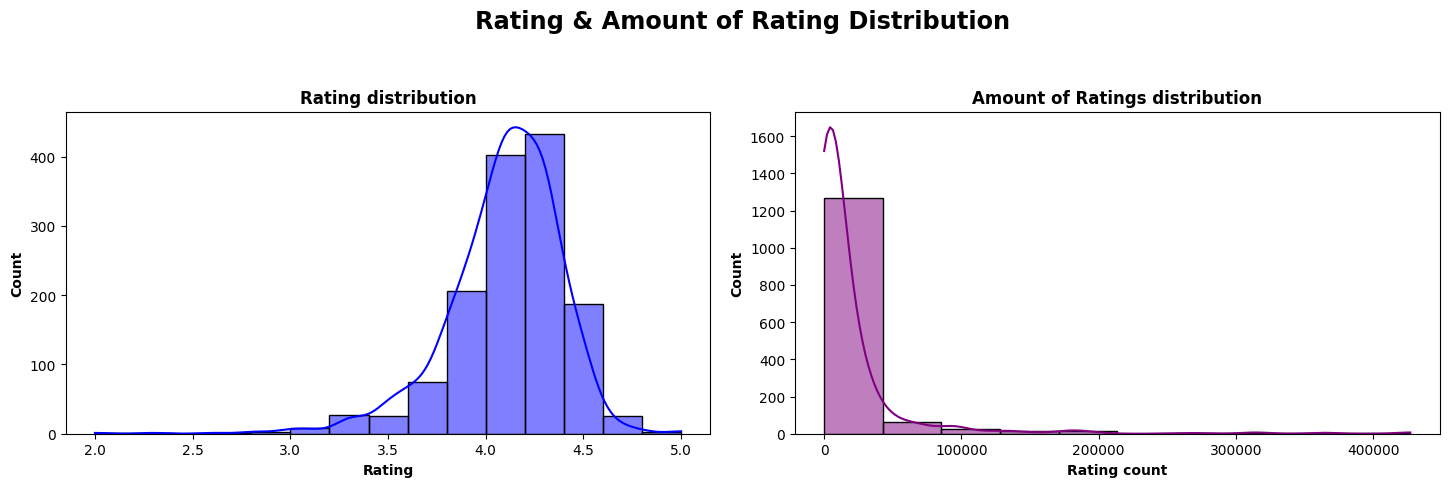

In [14]:
#Rating & Amount of Rating Distribution
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Rating & Amount of Rating Distribution', fontweight = 'heavy', size='xx-large')
fig.tight_layout(pad=3.0)
sns.histplot(ax=ax[0], data=df, x='rating', bins=15, kde=True, color='blue')
sns.histplot(ax=ax[1], data=df, x='rating_count', bins=10, kde=True, color='purple')
ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Rating count', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings distribution', fontweight='bold')

Most of the product rating range around 4.0 to 4.5 with no product under the score of 2.0. The rating distribution is slightly left-skewed.

The amount of ratings given to a product is very widespread. Most of the products that have been rated, have around 0 - 5000 amount of rating for each product. Interestingly, there are products that have more than 40000 ratings. The amount of rating distribution is highly right-skewed.

In [15]:
# Checking the amount of unique value and category apperance frequency in 'Maincategory'
maincategory_counts = df['Maincategory'].value_counts()
print(f"maincategory_counts:  {maincategory_counts}")

# Display amount of unique values in Maincategory
num_maincategories = df['Maincategory'].nunique()
print(f"num_maincategories: {num_maincategories}")

maincategory_counts:  Electronics              514
Home&Kitchen             448
Computers&Accessories    397
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: Maincategory, dtype: int64
num_maincategories: 9


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21760\190778085.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


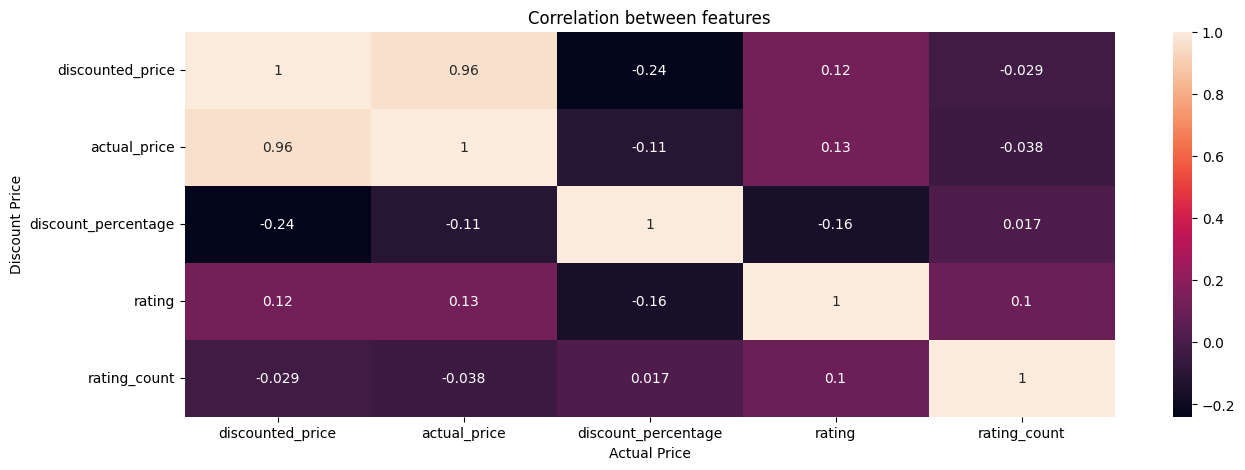

In [17]:
#heatmap & correlation between actual price and discounted price
plt.figure(figsize=(15, 5))
sns.heatmap(data=df.corr(), annot=True)
plt.xlabel('Actual Price')
plt.ylabel('Discount Price')
plt.title('Correlation between features')
plt.xticks(rotation=0)
plt.show()

There are almost no correlation between the features in dataset. Only the actual prices of product and the discounted prices of product have a positive correlation

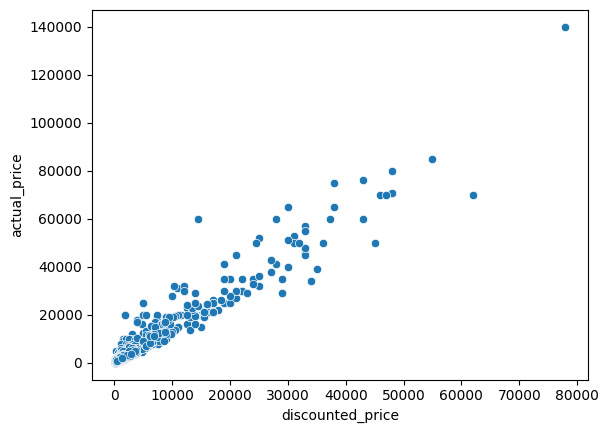

In [ ]:
sns.scatterplot(df,x='discounted_price', y='actual_price')
plt.show()

It is noteticed that the discounted price and actual price has a linear relationship. The higher the actual price lead to the increasing in the discounted price

### 4. VISUALIZING DATA

In [ ]:
df.groupby(['Maincategory','Subcategory'])['discounted_price'].sum().sort_values(ascending=False).head(3)

Maincategory  Subcategory           
Electronics   HomeTheater,TV&Video      1685954.00
              Mobiles&Accessories       1148582.00
Home&Kitchen  Kitchen&HomeAppliances     663149.14
Name: discounted_price, dtype: float64

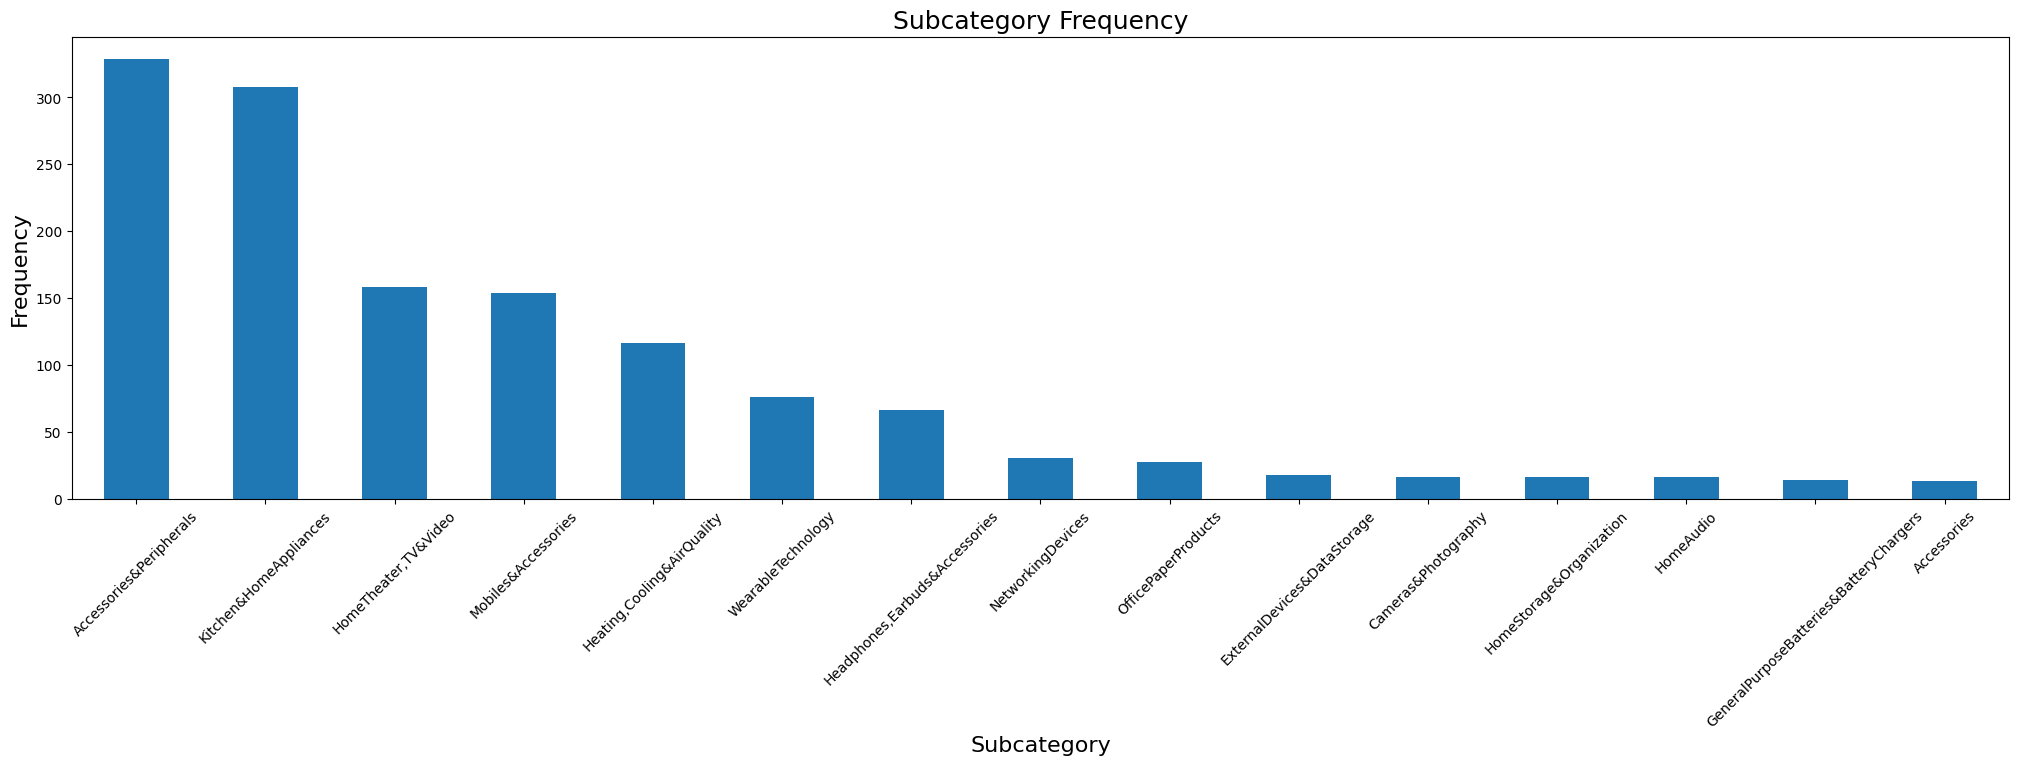

In [21]:

# Column charts display the apperance frequency of each category in 'Maincategory'
category_counts = df['Maincategory'].value_counts()
maincategory_counts = df['Subcategory'].value_counts().head(15)
plt.figure(figsize=(25, 6))
maincategory_counts.plot(kind='bar')
plt.xlabel('Subcategory', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Subcategory Frequency', fontsize=18)
plt.xticks(rotation=45)
plt.show()


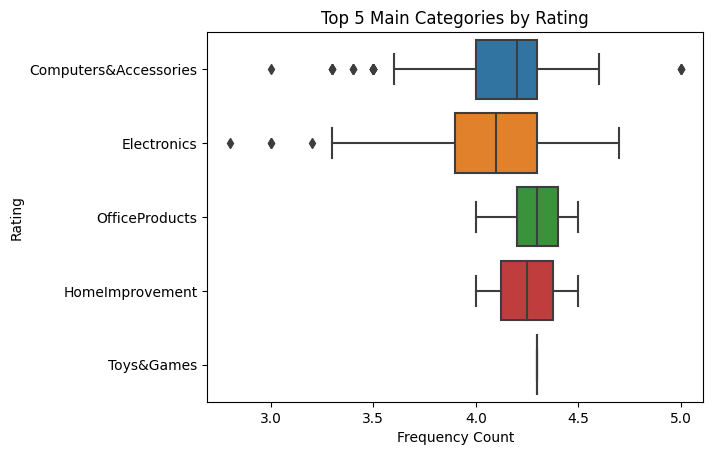

In [ ]:
#Rating
rating = df.groupby('Maincategory')['rating'].mean().sort_values(ascending = False).head(5).index
subset_dff = df[df['Maincategory'].isin(rating)]
sns.boxplot(data = subset_dff, x='rating' ,y = 'Maincategory')
plt.xlabel('Frequency Count')
plt.ylabel('Rating')
plt.title('Top 5 Main Categories by Rating')
plt.show()


Toys & Games product ratings's are around 3.75 - 4.375. All Home Improvement, and Office Products have a minimal rating of 4.0.

Many of the Computer & Accessories, and Electronics products have ratings in the range of 3.6 - 4.6. Though these categories do have products that have a high rating such as 5.0 and low rating, going down to 2.75.

To sum up, most of the products in this category fall in the range of around 3.8 - 4.6.

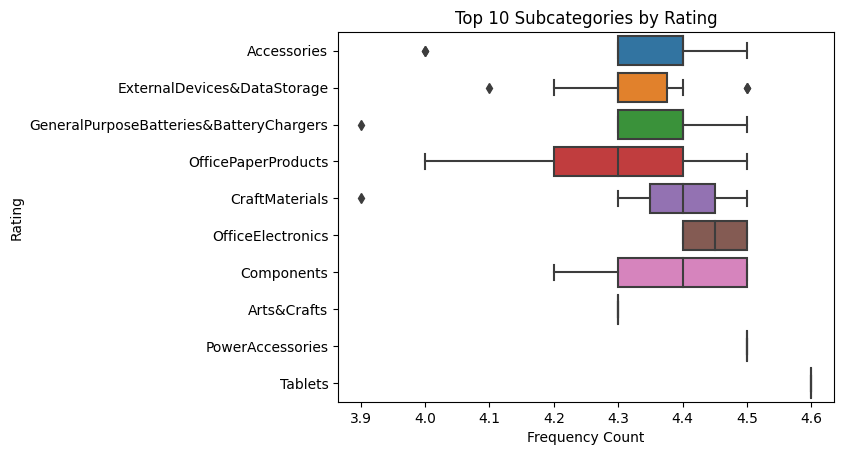

In [ ]:
#Top 10 subcategories by rating
rating = df.groupby('Subcategory')['rating'].mean().sort_values(ascending = False).head(10).index
subset_dff = df[df['Subcategory'].isin(rating)]
sns.boxplot(data = subset_dff, x='rating' ,y = 'Subcategory')
plt.xlabel('Frequency Count')
plt.ylabel('Rating')
plt.title('Top 10 Subcategories by Rating')
plt.show()

In the Rating Distribution by Product Sub-Category graph, we have noticed that the highest rated product comes from the sub category of Accessories & Peripherals. The lowest rated product comes from the sub category of Heating, Cooling & Air Quality.

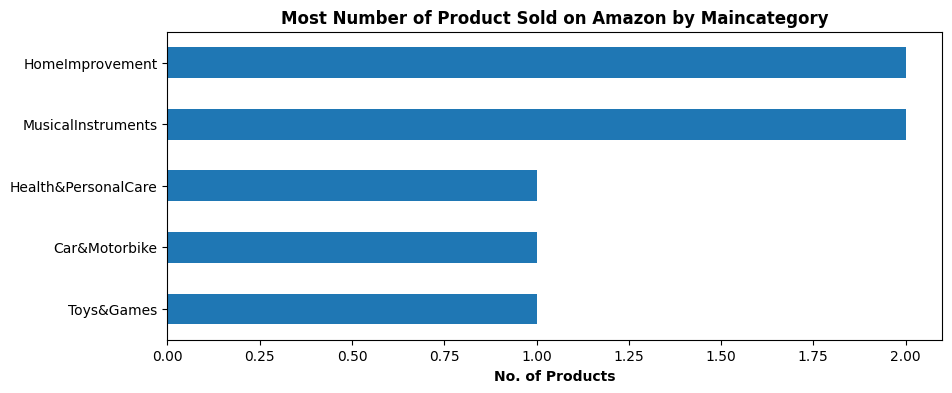

In [24]:
# Plot most number of Product Sold by Maincategory on Amazon
df['Maincategory'].value_counts().sort_values().head(5).plot(kind='barh', figsize =(10, 4))
plt.title("Most Number of Product Sold on Amazon by Maincategory", fontweight='bold')
plt.xlabel("No. of Products", fontweight='bold')
plt.show()

At first, we can see that the Electronics, Computer & Accessories and Home kitchen product are the best selling products of Amazon. With the Electronics account for more than 500 products, other 2 categories follow up with nearly 450 products sold.

About the rest, the amount of product sold is below 100.


Text(0.5, 0, 'Actual Price')

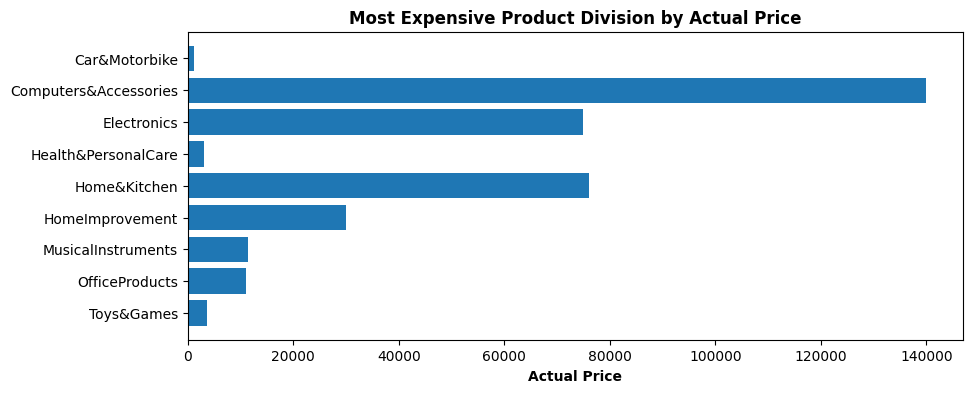

In [26]:
# Plot bar chart on Product Division by Actual Price
fig, ax = plt.subplots(figsize =(10, 4))
ax.barh(df['Maincategory'].sort_values(), df['actual_price'])
ax.invert_yaxis()
plt.title("Most Expensive Product Division by Actual Price", fontweight='bold')
plt.xlabel("Actual Price", fontweight='bold')


Text(0.5, 0, 'Discounted Price')

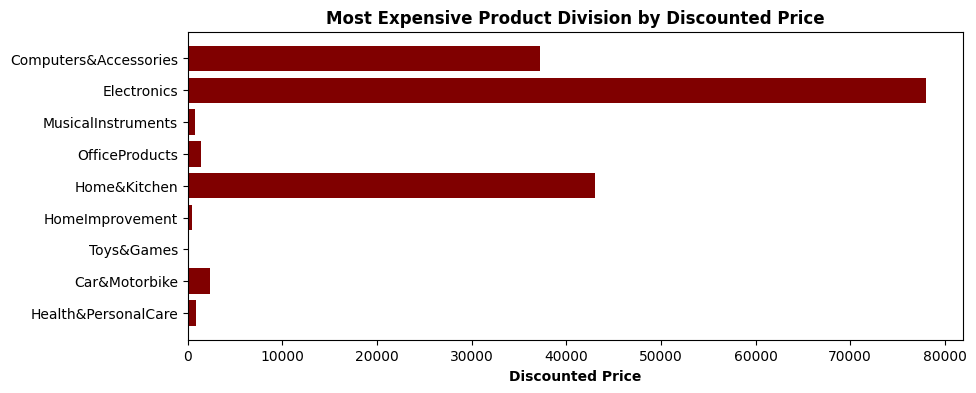

In [ ]:
# Plot bar chart display relation between Maincategory and Discounted Price
fig, ax = plt.subplots(figsize =(10, 4))
ax.barh(df['Maincategory'], df['discounted_price'], color ='maroon')
ax.invert_yaxis()
plt.title("Most Expensive Product Division by Discounted Price", fontweight='bold')
plt.xlabel("Discounted Price", fontweight='bold')

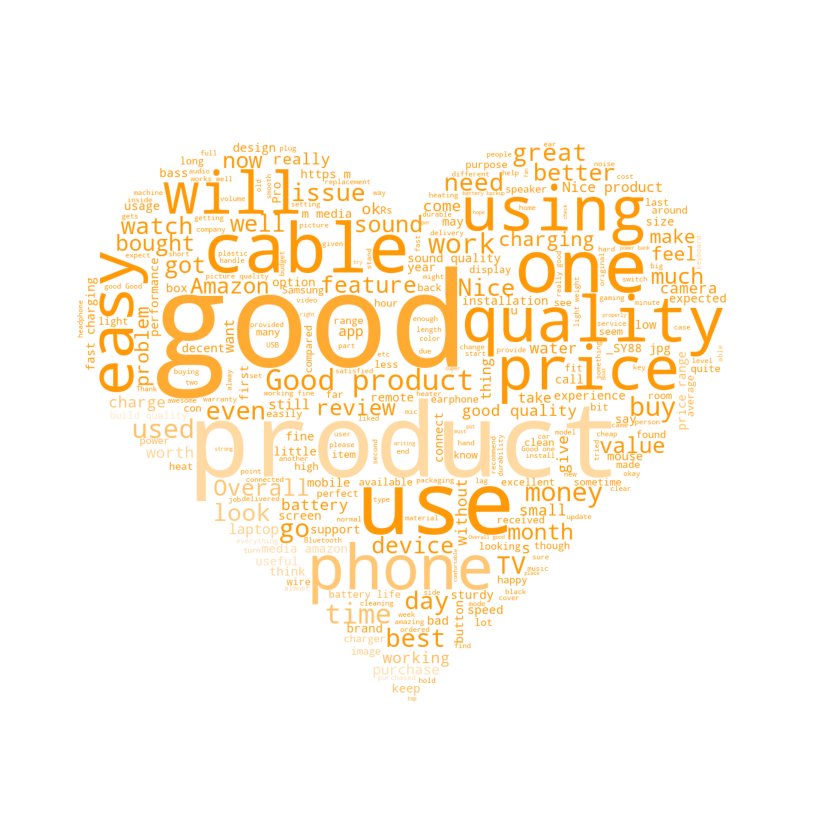

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
# Wordcloud shows the frequently used review words in review_content
reviews_text = ' '.join(df['review_content'].dropna().values)
heart_mask = np.array(Image.open('heart.png'))
colormap= ImageColorGenerator(heart_mask)
wc = WordCloud(stopwords = STOPWORDS, mask = heart_mask, background_color='white', max_words=300).generate(reviews_text)

plt.figure(figsize =(8, 8), facecolor=None)
wc.recolor(color_func=colormap)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

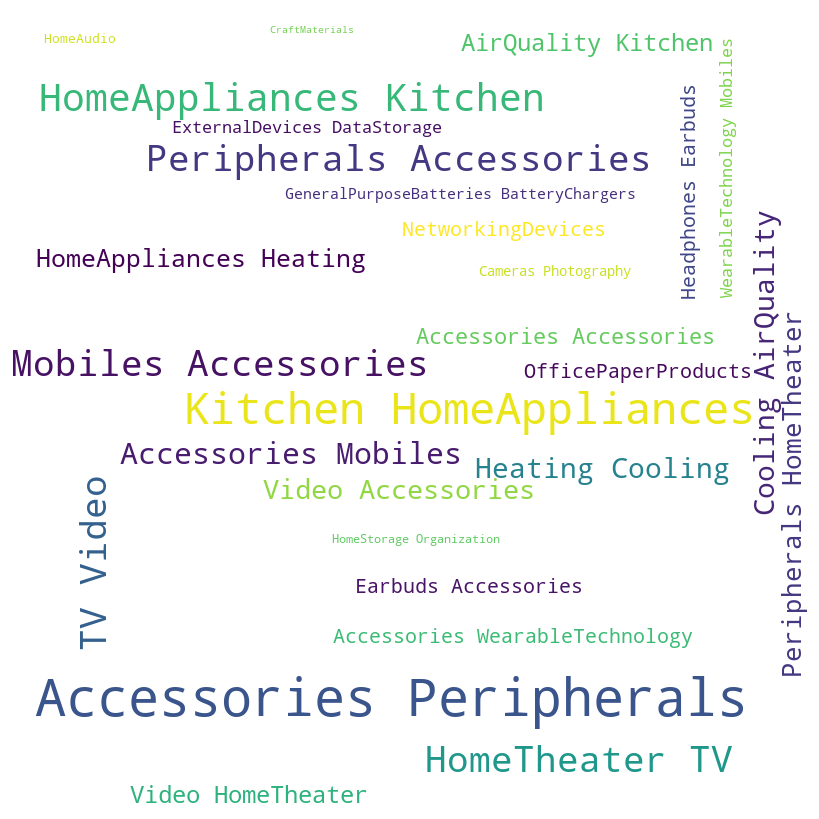

In [ ]:
# Wordcloud shows categories where purchased products have a rating above 4.0
high_rating_df = df[df['rating'] > 4.0]

# Create a string of all the reviews for these products
highrate_cate = ' '.join(high_rating_df['Subcategory'].dropna().values)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(highrate_cate)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()